In [29]:
import ast 
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub


Found the latest cached dataset configuration 'default' at C:\Users\welcome\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\ed776e5a0a8c40ea9d5efbd800772ae52e140f3e (last modified on Sat Nov 22 22:45:28 2025).


In [30]:
# Only get data analyst jobs in the US
df_da_us = df[ (df['job_title_short'] == 'Data Analyst') & (df['job_country'] =='United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualisation
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [31]:
df_da_us
df_da_us = df_da_us.explode('job_skills')
df_da_us['job_skills']


109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [32]:
df_da_us[['salary_year_avg' , 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [34]:
df_da_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [74]:
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['median' , 'count'])

df_da_top_pay = df_da_us_group.sort_values(by ='median', ascending = False ).head(10)
df_da_top_pay
df_da_skills = df_da_us_group.sort_values(by='count' , ascending = False).head(10).sort_values(by ='median', ascending = False)
df_da_skills


,median,count
job_skills,,
python,97500.00,1431
tableau,92875.00,1364
r,92500.00,893
sql server,92500.00,286
sql,91000.00,2508
sas,90000.00,926
power bi,90000.00,838
powerpoint,85000.00,462
excel,84392.00,1808


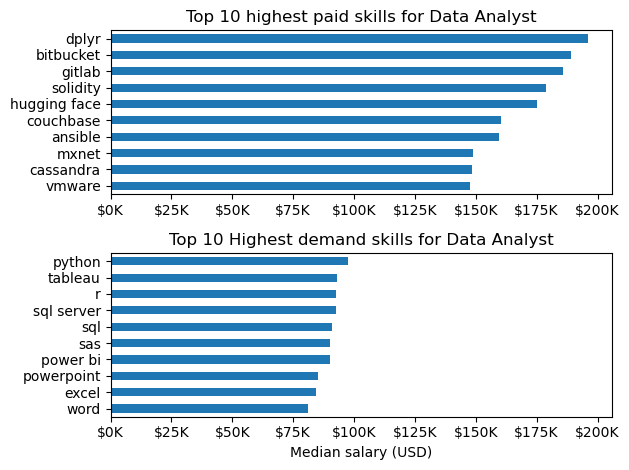

In [83]:
fig, ax = plt.subplots(2,1)

df_da_top_pay.plot(kind='barh',y='median' , ax=ax[0] , legend = False)
ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

df_da_skills.plot(kind='barh' , y='median' , ax=ax[1] , legend = False)
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Highest demand skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median salary (USD)')
ax[1].set_xlim(ax[0].get_xlim() )
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K' ))
fig.tight_layout()
